In [3]:
!pip install mediapipe opencv-python


In [2]:
import mediapipe as mp
import cv2
import numpy as np
import os
import uuid

In [3]:
mp_drawing=mp.solutions.drawing_utils
mp_hands=mp.solutions.hands

In [16]:

cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(200,88,40), thickness=7, circle_radius=4),
                                        #mp_drawing.DrawingSpec(color=(20,208,40), thickness=2, circle_radius=2)
                                        
                                         )
            

        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

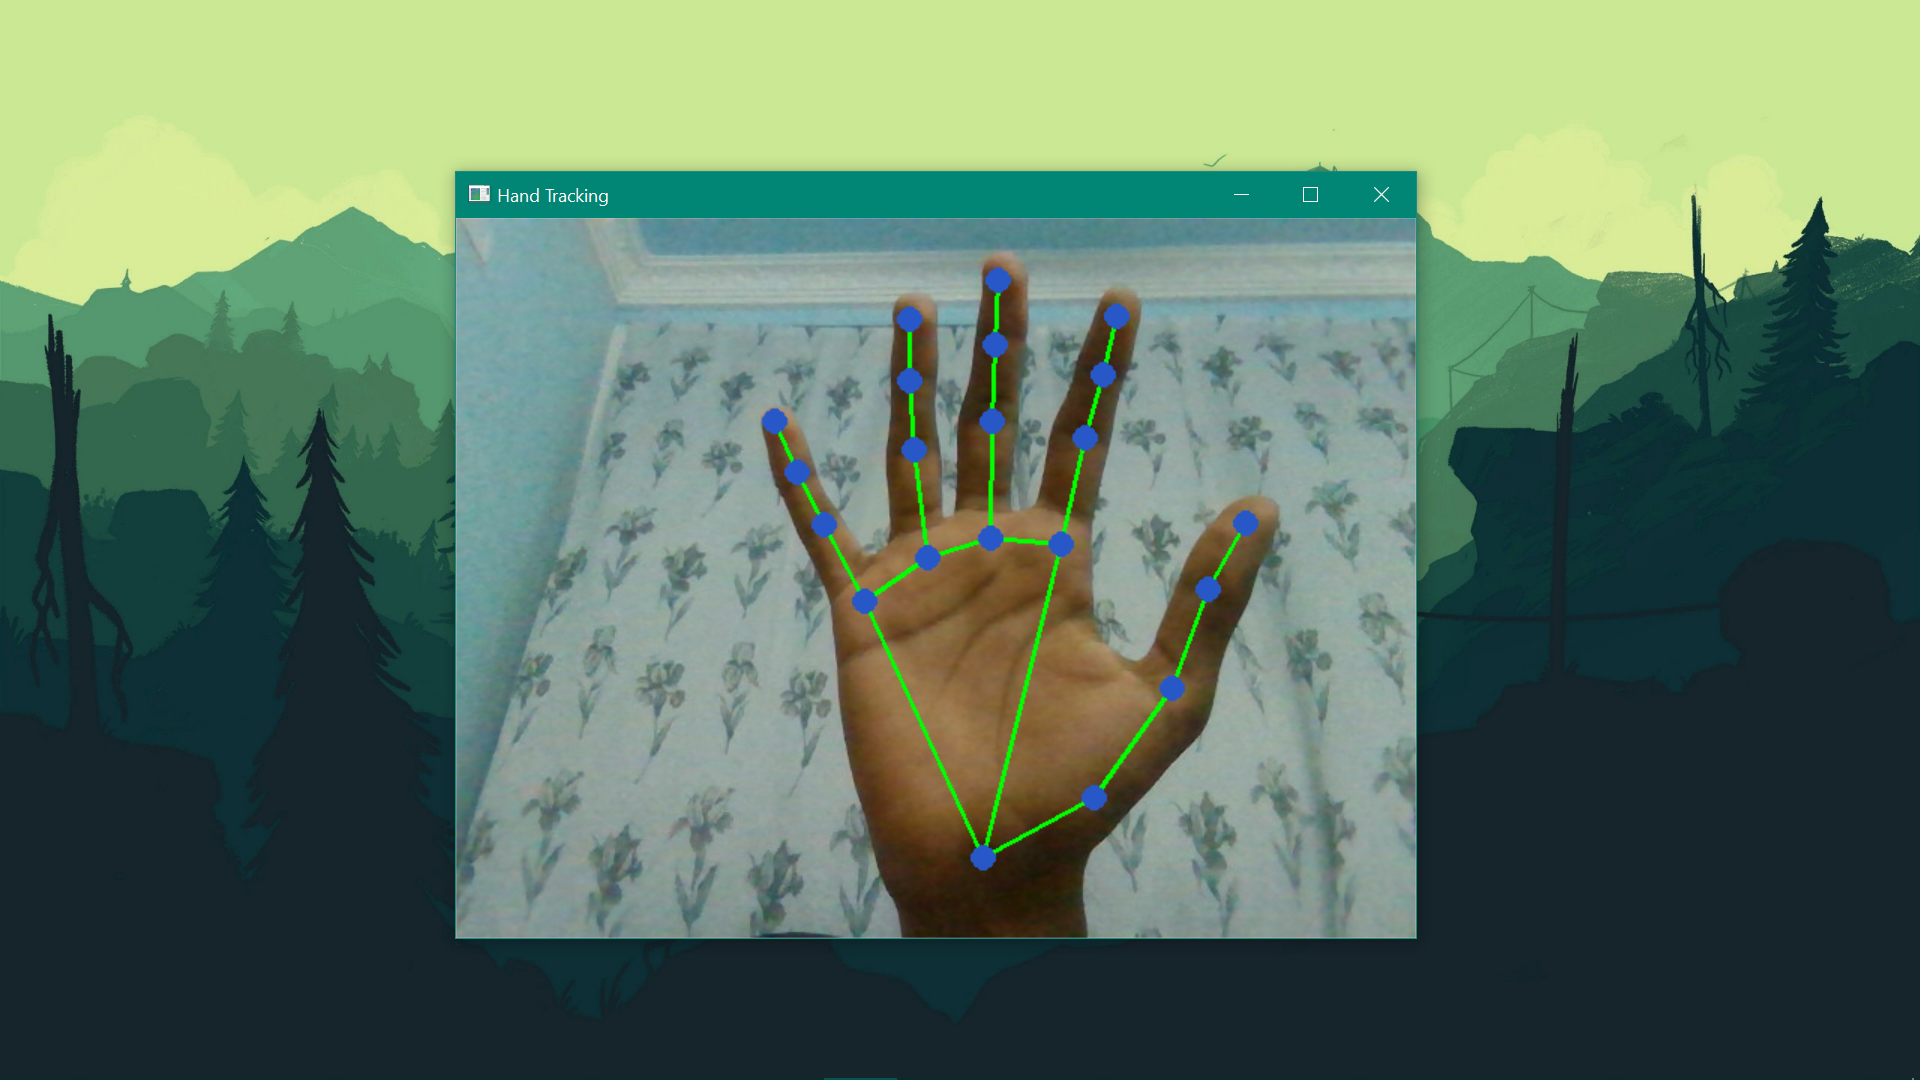

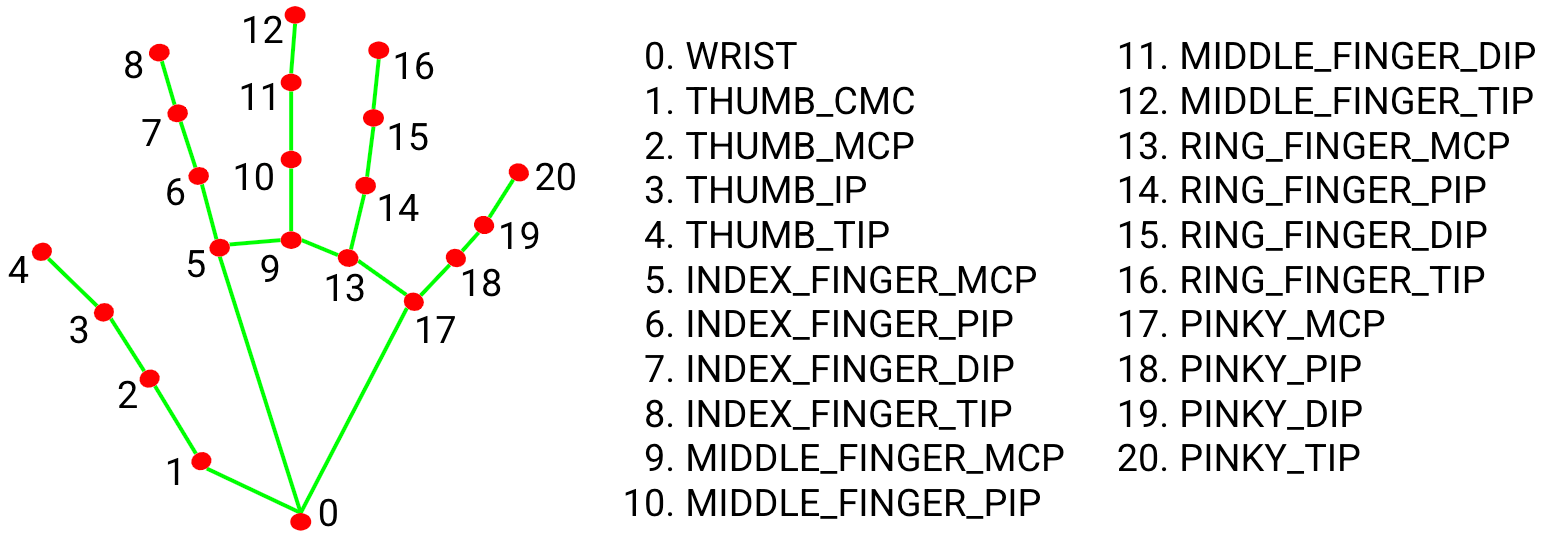